# **`Importing relevant Libraries`**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('liver_cirrhosis.csv')

In [3]:
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [4]:
#Finding the number of rows and columns in the dataset

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 25000
Number of columns: 19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

From the above information we can notice that there are 7 columns having object data type namely, Status, Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema. There are 3 columns (N_days, Age, Stage) having integer datatype and 9 columns having floating data type (Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin).

There are no null values in the data.

## Summary Statistics

We summarise only the descriptive statistical measures of the 11 features namely,'N_Days','Age','Bilirubin',	'Cholesterol', 'Albumin', 'Copper',	'Alk_Phos',	'SGOT',	'Tryglicerides', 'Platelets', 'Prothrombin' because all the other features have categorical data. 

In [6]:
df.select_dtypes(['int','float']).describe().T

count          mean          std      min       25%  \
N_Days         25000.0   1887.117040  1091.690918    41.00   1080.00   
Age            25000.0  18495.877080  3737.596616  9598.00  15694.00   
Bilirubin      25000.0      3.402644     4.707491     0.30      0.80   
Cholesterol    25000.0    372.331471   193.668452   120.00    275.00   
Albumin        25000.0      3.486578     0.380488     1.96      3.29   
Copper         25000.0    100.184663    73.184840     4.00     52.00   
Alk_Phos       25000.0   1995.675597  1798.885660   289.00   1032.00   
SGOT           25000.0    123.166345    47.747616    26.35     92.00   
Tryglicerides  25000.0    123.822548    52.786350    33.00     92.00   
Platelets      25000.0    256.007337    98.679006    62.00    189.00   
Prothrombin    25000.0     10.734549     0.904436     9.00     10.00   
Stage          25000.0      2.001160     0.813870     1.00      1.00   

                        50%           75%       max  
N_Days          1680.000000   2576.000000   4795.00  
Age            18499.000000  20955.000000  28650.00  
Bilirubin          1.300000      3.400000     28.00  
Cholesterol      369.510563    369.510563   1775.00  
Albumin            3.510000      3.750000      4.64  
Copper            97.648387    107.000000    588.00  
Alk_Phos        1828.000000   1982.655769  13862.40  
SGOT             122.556346    134.850000    457.25  
Tryglicerides    124.702128    127.000000    598.00  
Platelets        251.000000    311.000000    721.00  
Prothrombin       10.600000     11.100000     18.00  
Stage              2.000000      3.000000      3.00

In [7]:
#checking for the column names
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [8]:
#Checking for Duplicated data
df.duplicated().sum()

15361

In [9]:
df.drop_duplicates(inplace=True)

The values in Age column are given in days, so we convert them into years, since it will be convenient for us to tackle them. \
We also convert the values in column N_Days into years and store them in a new column N_Years for the same reason. \
We drop the column N_Days.

In [10]:
df['Age']=round(df['Age']/365)
df['N_Years'] = round(df['N_Days']/365)
df.drop(['N_Days'],axis=1,inplace=True)

We can see that there are no duplicates datas. Now we proceed with the Exploratory Data Analysis.

# **`Exploratory Data Analysis`**

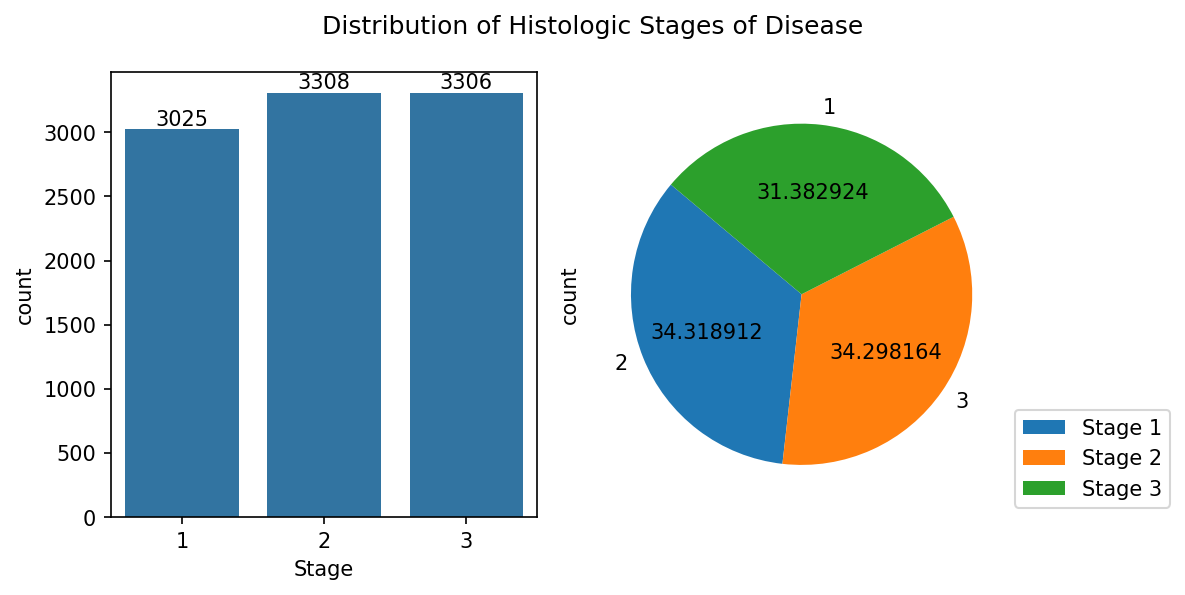

In [11]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Histologic Stages of Disease')

a= sns.countplot(data=df,x='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Stage'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,ax=axes[1])
axes[1].legend(['Stage 1', 'Stage 2','Stage 3'],loc=(1,0))

fig.tight_layout();

We can see that the target variable Stage has uniform proportion of distribution throughout the three classes. So the dataset is not so imbalanced. That is we can work with this data, there is no need for balancing.

Text(0.5, 1.0, 'Distribution of status of the patient')

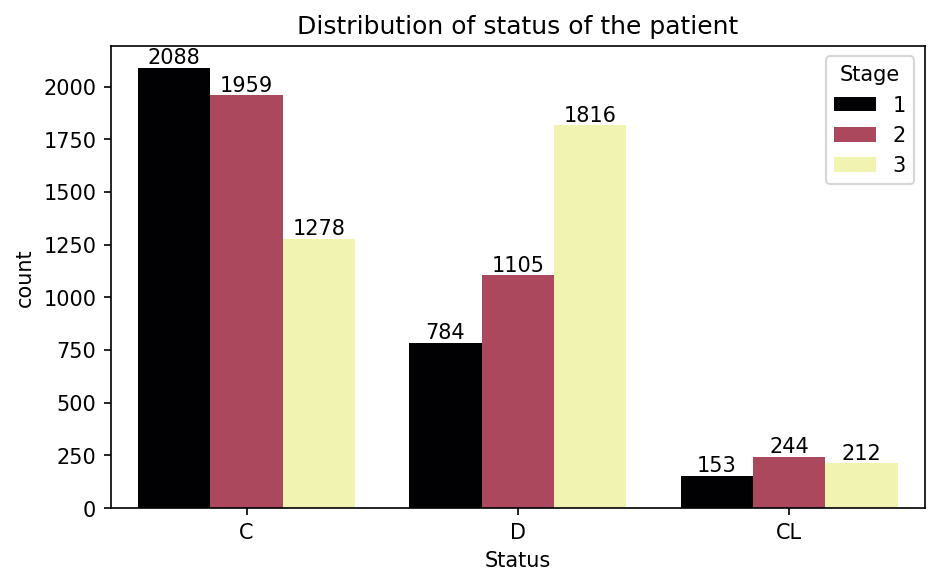

In [12]:
plt.figure(figsize=(7,4),dpi=150)
ax=sns.countplot(data=df,x="Status",palette="inferno",hue='Stage')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of status of the patient')

The above shows that cases where patients are censored, the no. of Stage 1 patient is more while cases with censored due to liver transplantation has similar number of Stage 1, 2 and 3 patients.
Cases with deaths have more number of stage 3 patients.

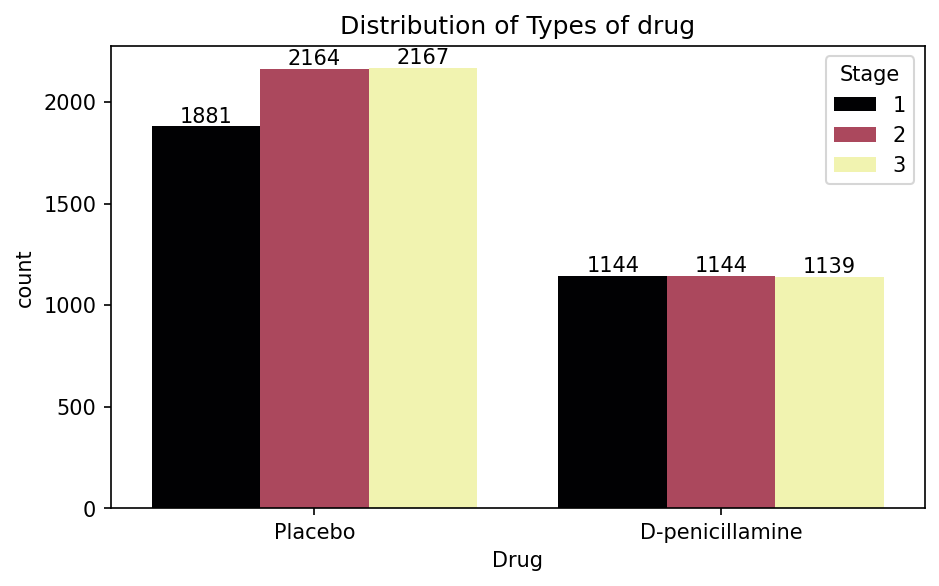

In [13]:
plt.figure(figsize=(7,4),dpi=150)
ax=sns.countplot(data=df,x="Drug",palette='inferno',hue='Stage')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Types of drug');

The above numbers represent the number of people that were given placebo or D-penicillamine.

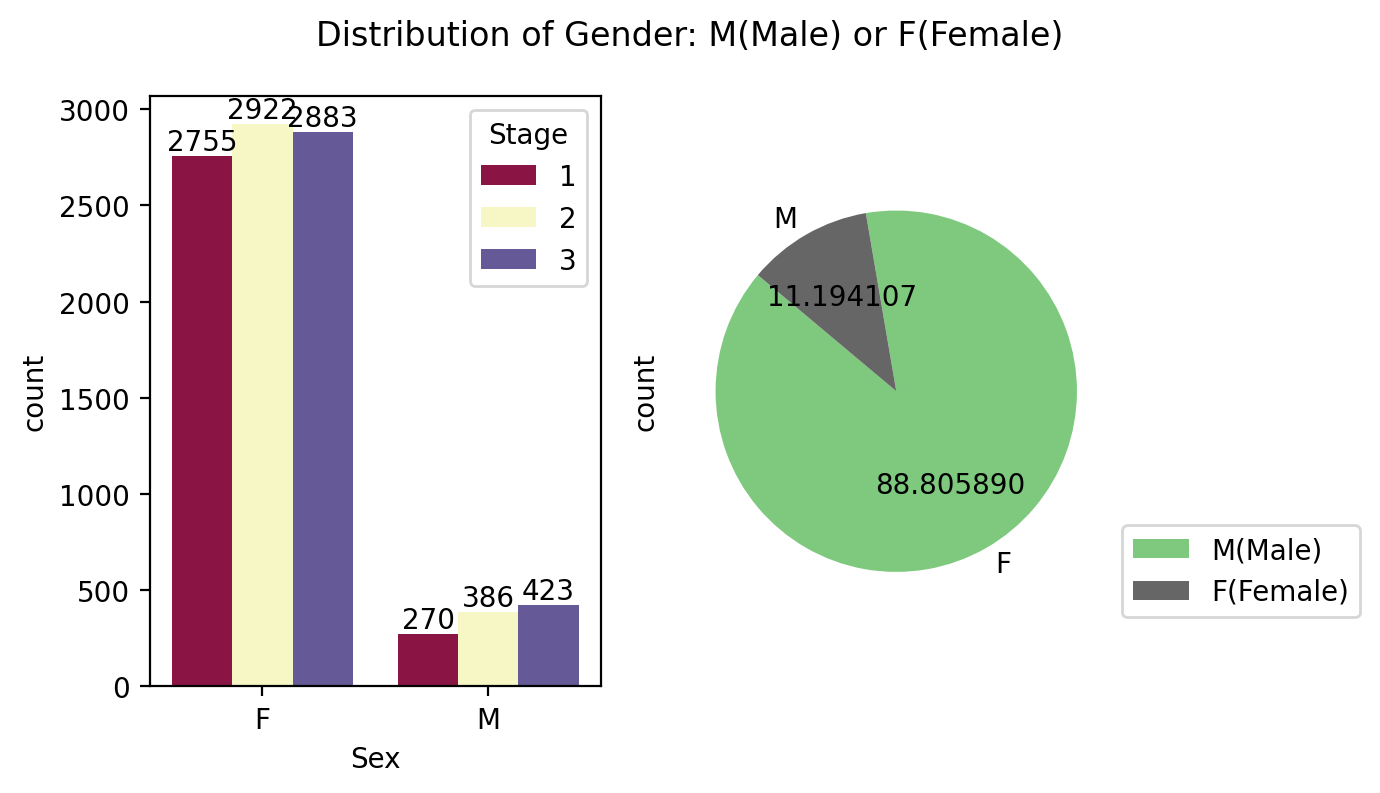

In [14]:
fig, axes =plt.subplots(1,2,figsize=(7,4),dpi=200)
fig.suptitle('Distribution of Gender: M(Male) or F(Female)')

a =sns.countplot(data=df,x="Sex",palette='Spectral',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Sex'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Accent',ax=axes[1])
axes[1].legend(['M(Male)', 'F(Female)'],loc=(1,0))

fig.tight_layout();

The above numbers represent the number of Stage 1, Stage 2 and Stage 3 patients that were found from the two genders.

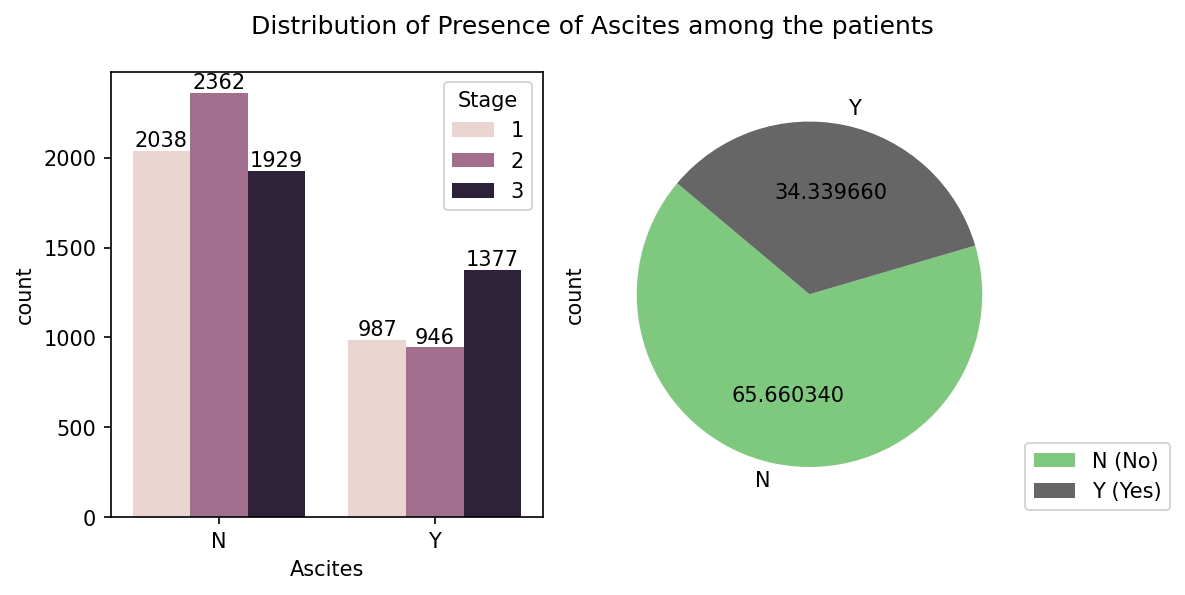

In [15]:
fig, axes = plt.subplots(1,2,figsize=(8,4),dpi=150)

fig.suptitle('Distribution of Presence of Ascites among the patients')

a =sns.countplot(data=df,x='Ascites',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Ascites'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Accent',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],loc=(1,0))

fig.tight_layout();

It was noticed that among the patients having Ascites, maximum of them had Stage 3 liver cirrhosis.

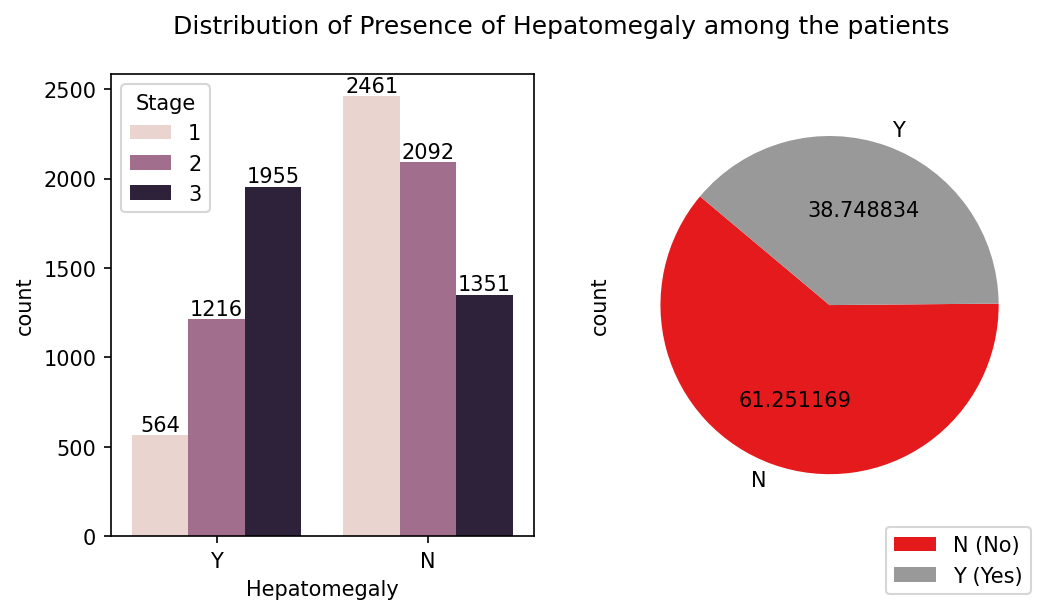

In [16]:
fig,axes = plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Presence of Hepatomegaly among the patients')

a = sns.countplot(data=df,x='Hepatomegaly',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Hepatomegaly'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Set1',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],bbox_to_anchor=(1, 0));

It is noticed that among the patients having Hepatomegaly, most of them are found to have stage 1 liver cirrhosis.

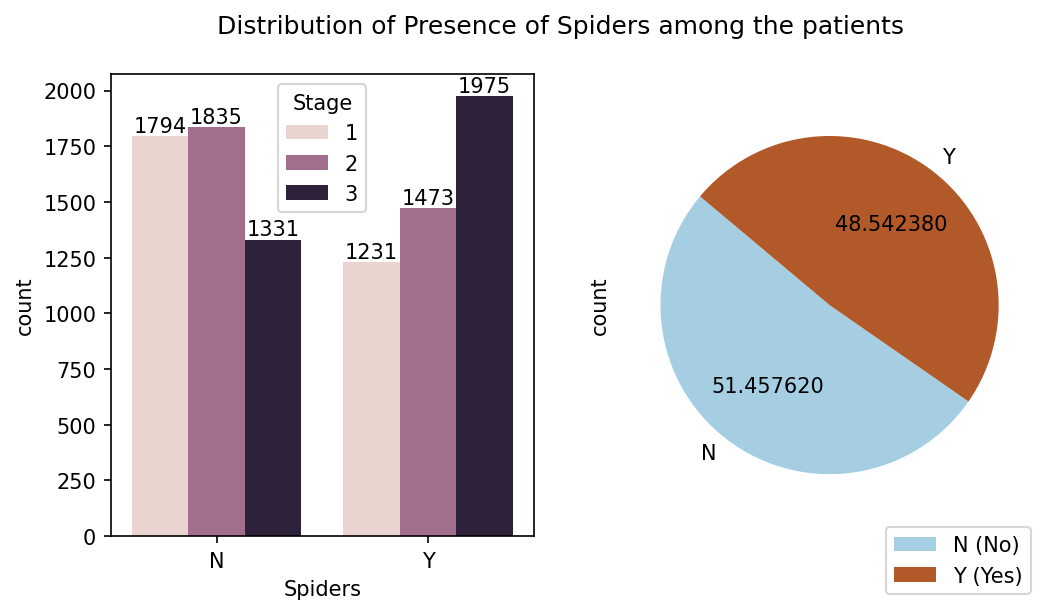

In [17]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Presence of Spiders among the patients');

a= sns.countplot(data=df,x='Spiders',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Spiders'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Paired',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],bbox_to_anchor=(1, 0));

It is noticed that among the patients having Spider angiomas, most of them have stage 3 liver cirrhosis.

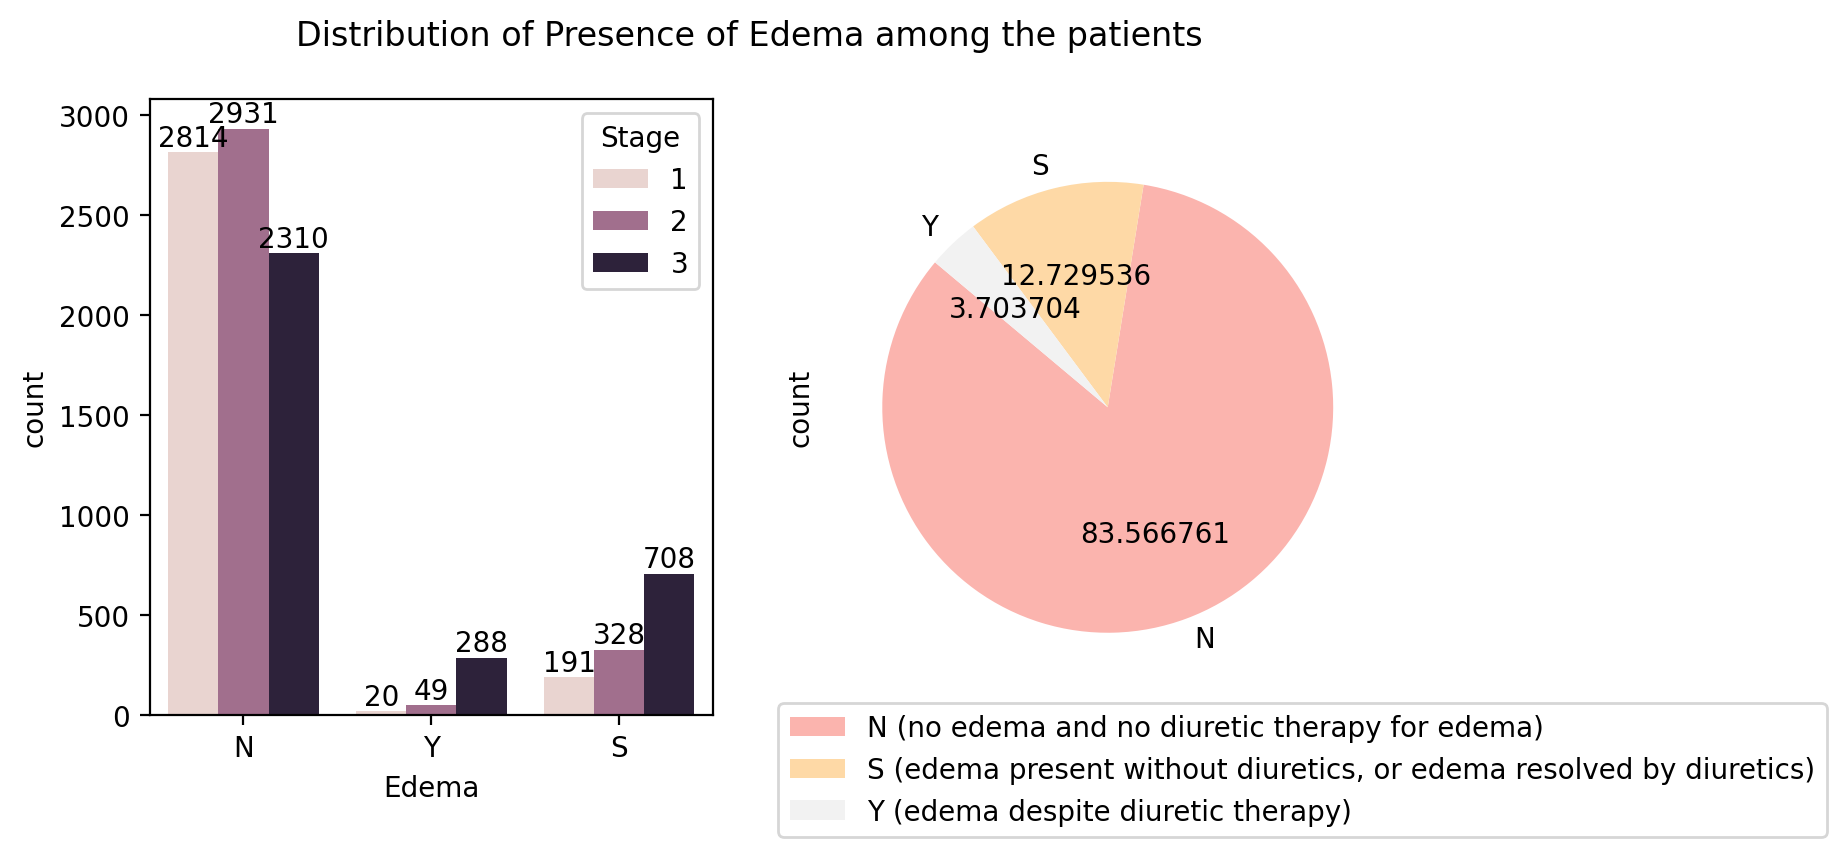

In [18]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=200)
fig.suptitle('Distribution of Presence of Edema among the patients');

a= sns.countplot(data=df,x='Edema',hue='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Edema'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Pastel1',ax=axes[1])
axes[1].legend(['N (no edema and no diuretic therapy for edema)', 'S (edema present without diuretics, or edema resolved by diuretics)', 'Y (edema despite diuretic therapy)'],bbox_to_anchor=(1.8, 0));

Maximum patients do not have Edema, however, patients with edema present without diuretics, or edema resolved by diuretics, most of them are stage 3 patients; and among those having edema despite diuretic therapy, most of them are stage 3 patients.

In [19]:
df_num = df.select_dtypes(['int','Float64'])

<Figure size 1800x1800 with 0 Axes>

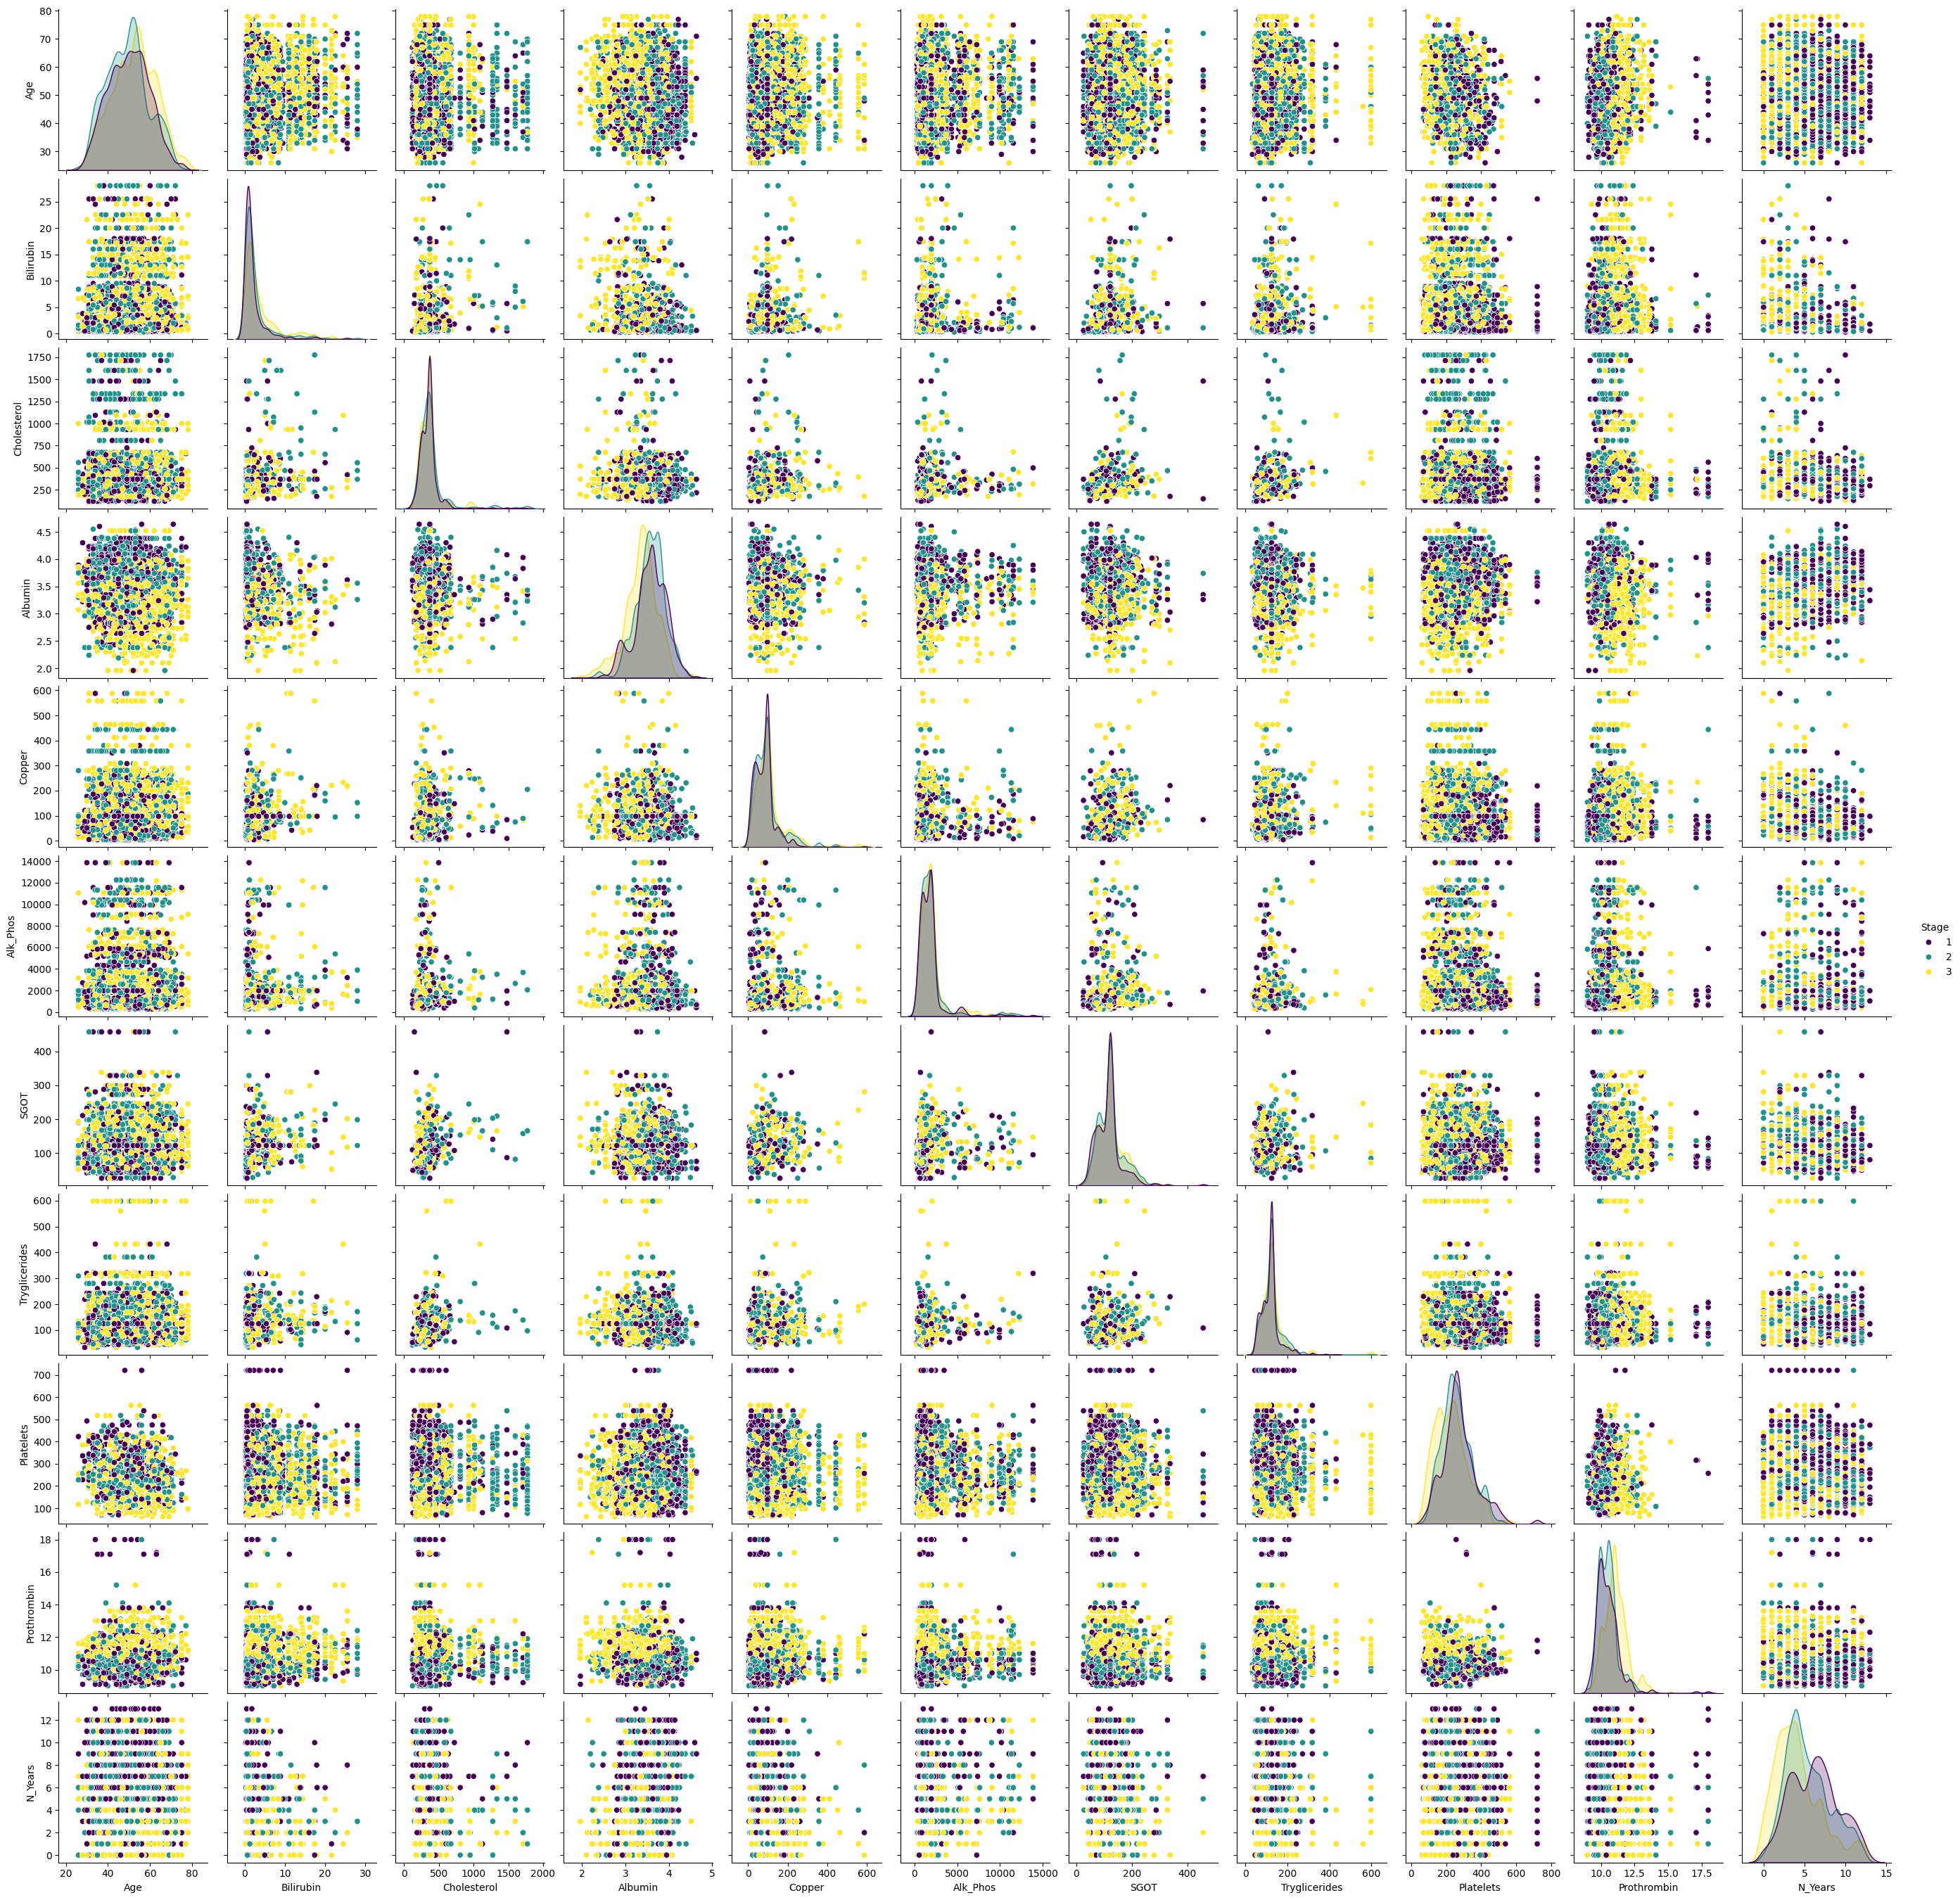

In [20]:
plt.figure(figsize=(12,12),dpi=150)
sns.pairplot(df_num,hue='Stage',palette='viridis');

The pairplot does not show any correlation between the features properly, so we try to study the features individually.

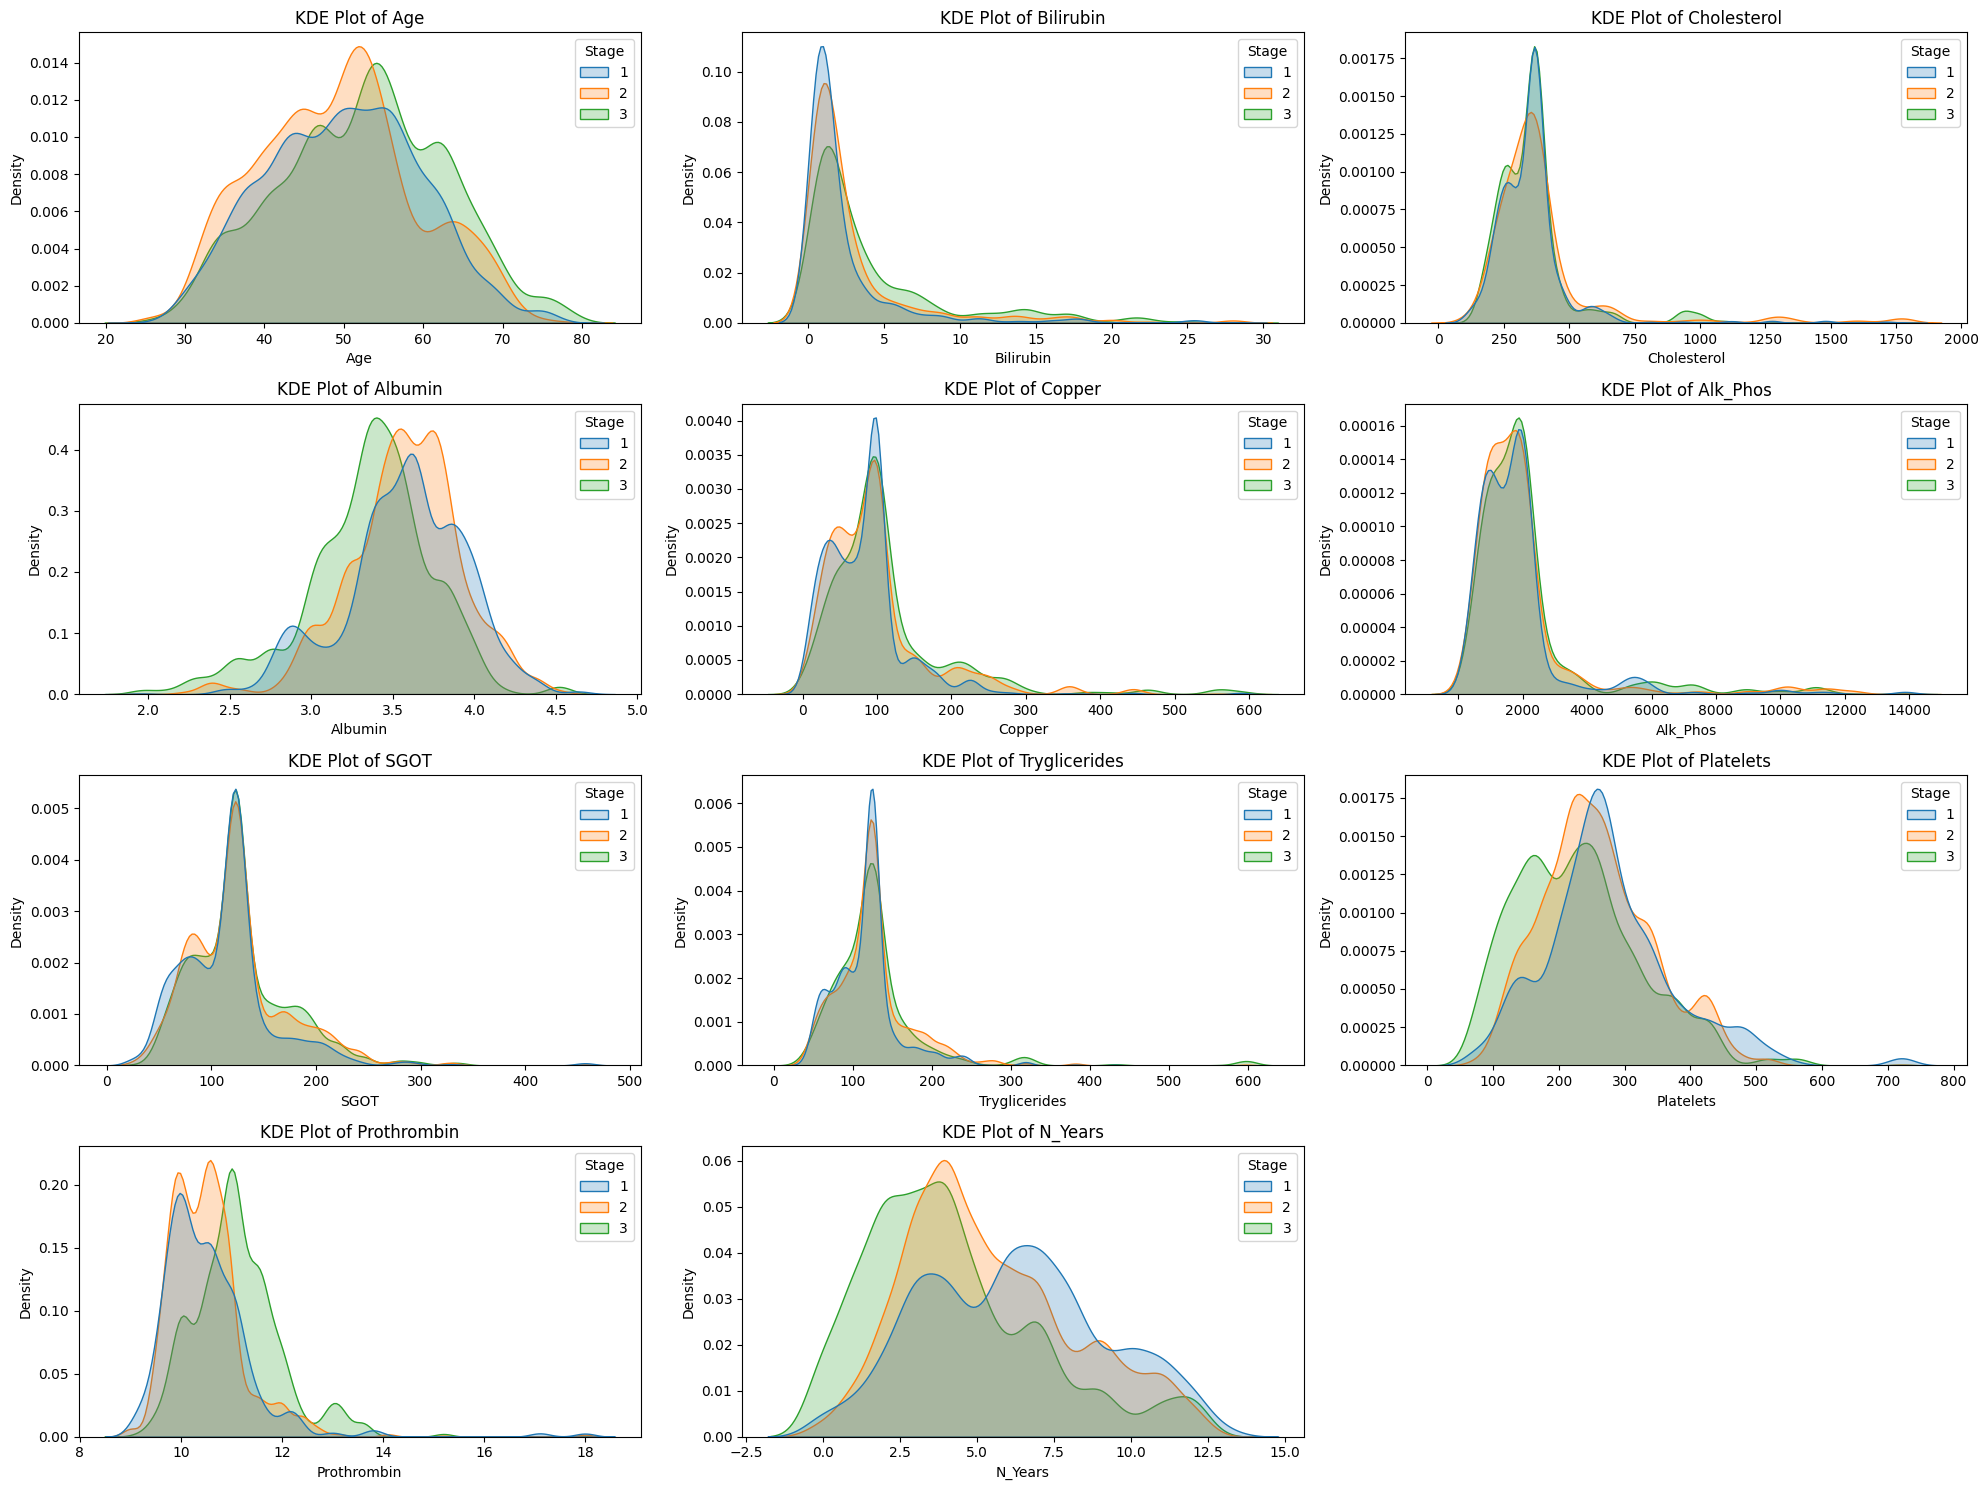

In [21]:
df_num = df.select_dtypes(['int','Float64'])
col = list(df_num.drop('Stage',axis=1).columns)
fig, axes= plt.subplots(4,3,figsize=(20, 15))
k=0
for i in range(4):
    for j in range(3):
        if (k< len(col)):
            sns.kdeplot(data=df,x=col[k],ax=axes[i,j],palette='tab10',fill=True,hue='Stage')
            axes[i,j].set_title(f'KDE Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

In [22]:
df_num.drop('Stage',axis=1).skew()

Age              0.086088
Bilirubin        2.739227
Cholesterol      3.986612
Albumin         -0.500259
Copper           2.727683
Alk_Phos         3.502361
SGOT             1.462575
Tryglicerides    3.531199
Platelets        0.743684
Prothrombin      2.193244
N_Years          0.474960
dtype: float64

**Takeaways:**
- Albumin is slightly negatively skewed.
- Age and N_Years are quite symmetric.
- All the other features have high positive skewness.
    

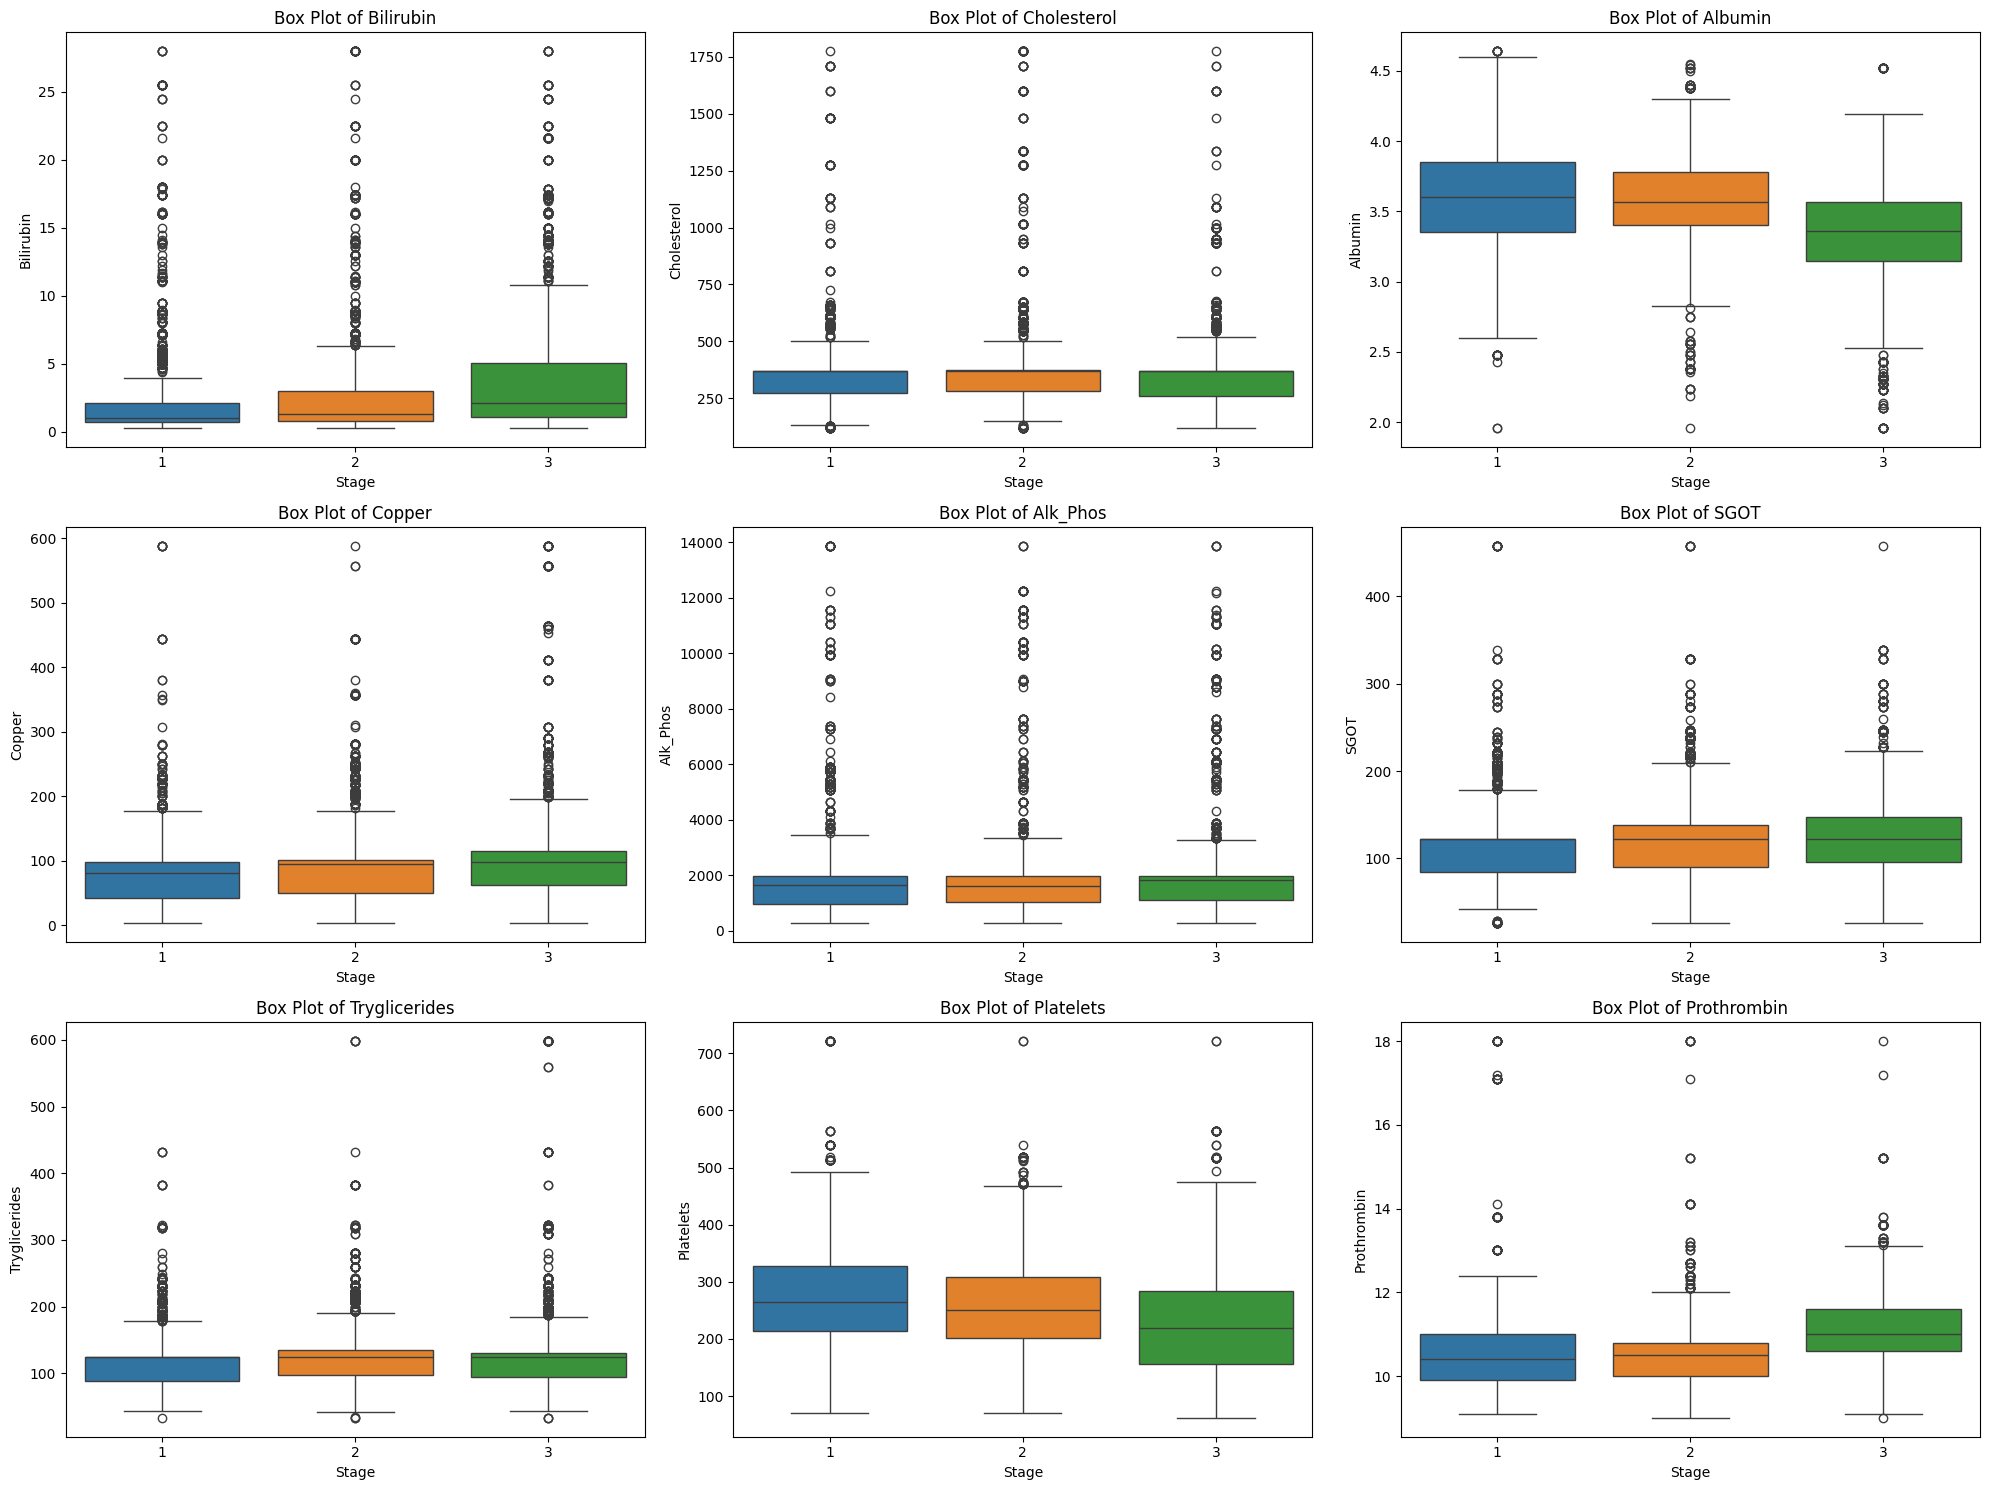

In [23]:
col = list(df_num.drop(['Stage','N_Years','Age'],axis=1).columns)
fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=df,x='Stage',y=col[k],ax=axes[i,j],palette='tab10')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

**Takeaways:**
- *Bilirubin* -
    - The amount of bilirubin in Stage 3 patients is between 0-11 mg/dl.
    - The amount of bilirubin in Stage 2 patients is between 0-5 mg/dl.
    - Stage 2 patients have a bilirubin amount less than 5 mg/dl.
    - Stage 3 has comparatively less outliers than Stage 2 and 1.
- *Cholesterol* - 
    -  The cholesterol level for the three stages is similar. The level lies between 100-500 mg/dl.
- *Albumin* -
    - Stage 3 has less Albumin amount ranging from 2.5 - 4.25 gm/dl than Stage 2 and Stage 1.
    - Stage 1 has the least number of outliers.
- *Platelets* -
    - All the stages have similar range of platelets (less than 500)
    - Majority of patients in Stage 3 have comparatively lesser number of platelets than stage 1 and 2.
- *Prothrombin* -
    - Stage 3 have a higher level of prothrombin compared to the other two stages.
    
     

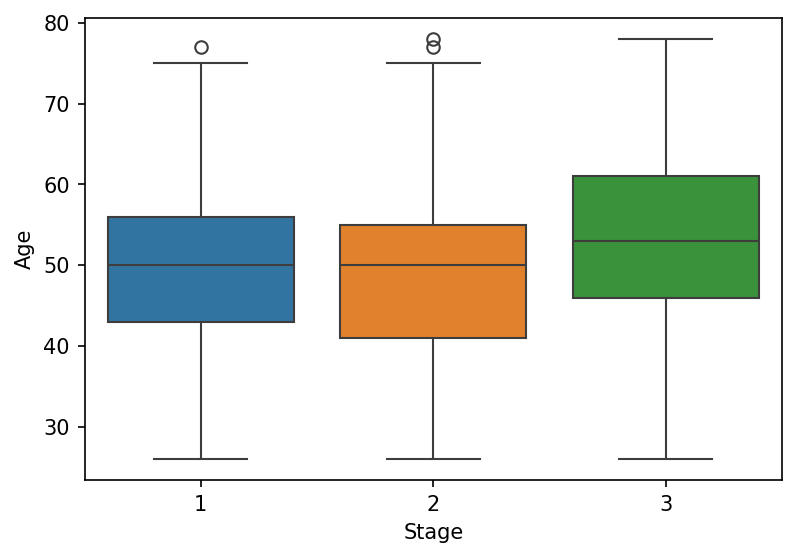

In [24]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(data=df,x='Stage',y='Age',palette='tab10');

**Takeaways** -
- Patients in the range of 46-61 years are more prone to have Stage 3 liver Cirrhosis.
- Patients in the range of 40-55 years are more prone to have Stage 2 liver Cirrhosis.
- Patients in the range of 43-57 years are more prone to have Stage 1 liver Cirrhosis 
- There are 2 outliers in Stage 2 and 1 outlier in Stage 1.

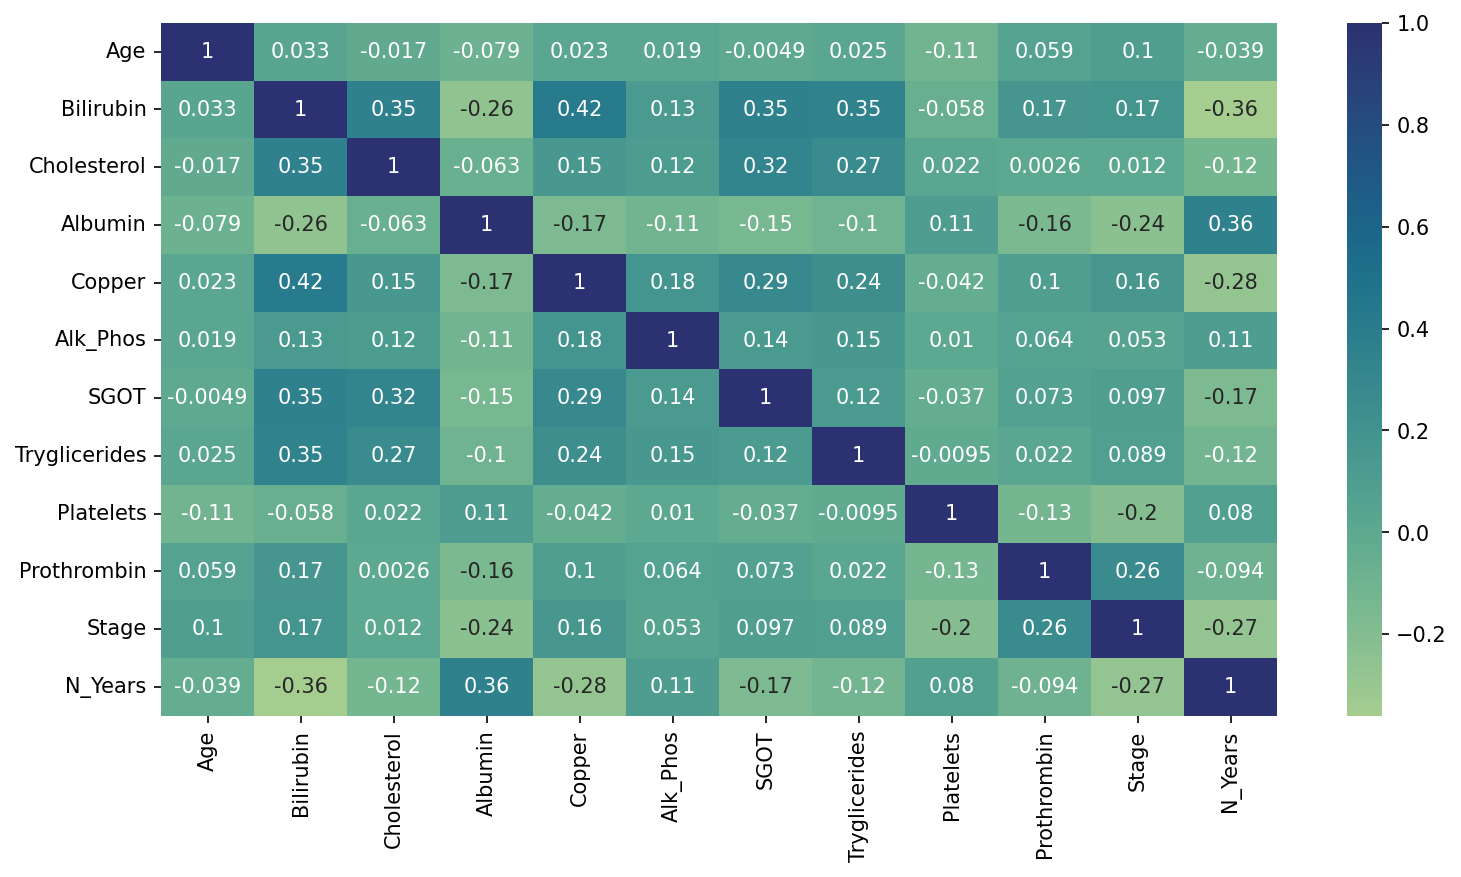

In [25]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(df_num.corr(),annot=True,cmap='crest');

**Takeaways**:
- Stage has some positive correlation with Prothrombin (0.26). This means that as Stage increases from 1 to 3, the level of Prothrombin increases.
- Stage has some negative correlation with Platelets (-0.2), Albumin (-0.24) and N_years (-0.27).This means that as Stage decreases from 3 to 1, these factors decrease.
- N_Years have a positive correlation of 0.36 with Albumin. This means that as there is a increase in between registration and the earlier of death, transplantation, or study analysis time, there is a increase in the rate of Albumin.
- Bilirubin and Copper has a positive correlation of 0.42, so as Bilrubin increases there is an increase in the rate of copper.
- SGOT and Bilirubin has a low positve correlation of 0.35.
- Triglycerides and Bilirubin has a low positive correlation of 0.35, which implies that one increases or decreases with the other in small amounts.

# **`Data Preparation`**

In order to work with the data, we need to make some changes with the categorical features. We convert the categories into integer values so that we cake make use of them while modelling.

In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
categ = ['Status','Drug', 'Sex', 'Ascites',	'Hepatomegaly',	'Spiders',	'Edema']
df[categ] = df[categ].apply(LE.fit_transform)

### Checking for Outliers

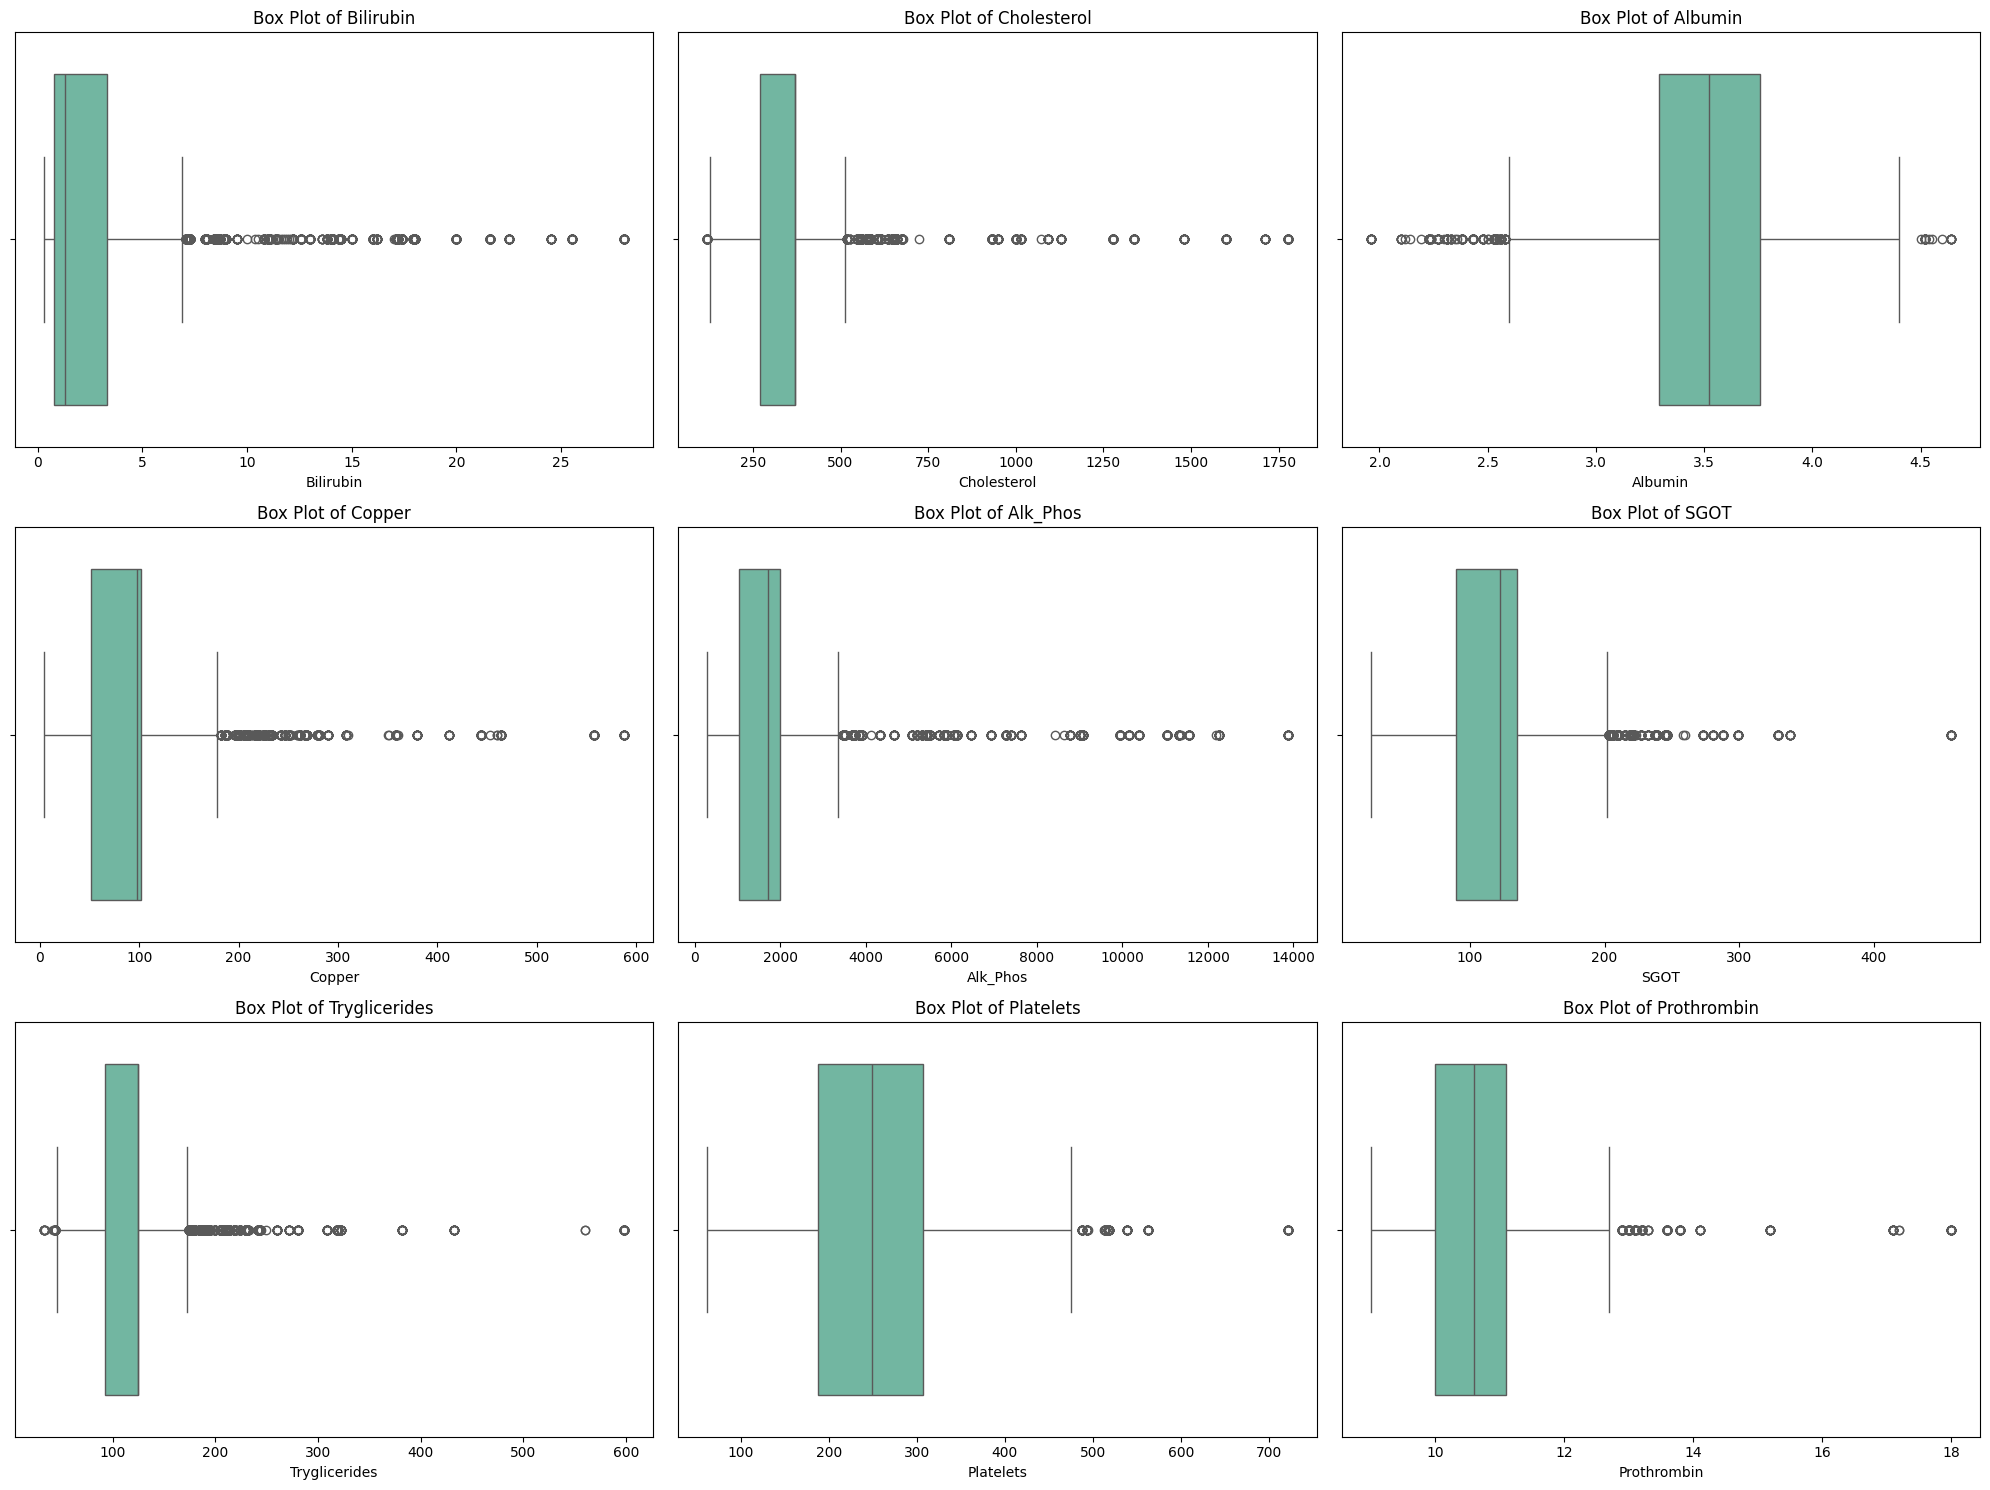

In [27]:
col = list(df_num.drop(['Stage','N_Years','Age'],axis=1).columns)
fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

First we will eliminate the outliers.

### Outlier Capping using IQR method

In [28]:
def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)

In [29]:
def cap(a):
    for i in a:
        df.loc[df[i] >= outlier(df[i])[1],i] = outlier(df[i])[1]
        df.loc[df[i] <= outlier(df[i])[0],i] = outlier(df[i])[0]

In [30]:
cap(df_num.drop('Stage',axis=1))

In [31]:
x = df.drop(['Stage'],axis=1)
y = df['Stage']

y = y - y.min()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **`Model Building`**

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.model_selection import GridSearchCV
param_rfc = {'n_estimators': [int(x) for x in np.linspace(start=10,stop=80,num=10)],
             'max_features': ['log2','sqrt',None],
             'max_depth':[2,4,7]}
rfc_model = RandomForestClassifier()
gs_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = param_rfc,cv=3,n_jobs=4,error_score='raise')
gs_rfc_model.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 7],
                         'max_features': ['log2', 'sqrt', None],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [38]:
gs_rfc_model.best_params_

{'max_depth': 7, 'max_features': None, 'n_estimators': 80}

Fitting Random Forest Classifier with the best parameters

In [39]:
rfc_model = gs_rfc_model.best_estimator_

In [40]:
rfc_preds = rfc_model.predict(X_test)

## XGBoost Classifier

In [41]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()),random_state=42,eval_metric='mlogloss')
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
gs_xg_model = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=4,error_score='raise')
gs_xg_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [42]:
print("Best Parameters:",gs_xg_model.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


Fitting XGBoost Classifier with the best parameters

In [43]:
xg_model = gs_xg_model.best_estimator_

In [44]:
xg_preds = xg_model.predict(X_test)

## Histogram-based Gradient Boosting Classification

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier
HG = HistGradientBoostingClassifier()
param_hg = {'learning_rate':[0.01,0.1,1.0],
            'max_iter':[100,150,200]}
gs_hg_model = GridSearchCV(HG,param_grid=param_hg,cv=3,n_jobs=-1)

In [46]:
gs_hg_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_iter': [100, 150, 200]})

In [47]:
gs_hg_model.best_params_

{'learning_rate': 0.1, 'max_iter': 200}

Fitting Histogram based Gradient Boosting Classifier with the best parameters

In [48]:
hg_model = gs_hg_model.best_estimator_

In [49]:
hg_preds = hg_model.predict(X_test)

# **`Feature Importance`**

Feature: 0 - Status, Score: 0.00836
Feature: 1 - Drug, Score: 0.00542
Feature: 2 - Age, Score: 0.05866
Feature: 3 - Sex, Score: 0.00192
Feature: 4 - Ascites, Score: 0.01032
Feature: 5 - Hepatomegaly, Score: 0.11063
Feature: 6 - Spiders, Score: 0.01294
Feature: 7 - Edema, Score: 0.03107
Feature: 8 - Bilirubin, Score: 0.05474
Feature: 9 - Cholesterol, Score: 0.02201
Feature: 10 - Albumin, Score: 0.13435
Feature: 11 - Copper, Score: 0.04011
Feature: 12 - Alk_Phos, Score: 0.02751
Feature: 13 - SGOT, Score: 0.03113
Feature: 14 - Tryglicerides, Score: 0.02366
Feature: 15 - Platelets, Score: 0.09099
Feature: 16 - Prothrombin, Score: 0.24673
Feature: 17 - N_Years, Score: 0.08944


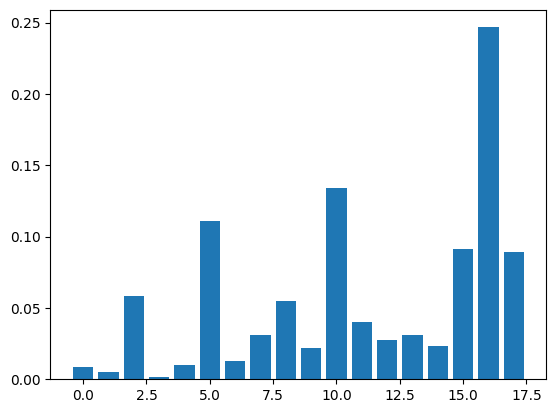

In [50]:
importance = rfc_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'Feature: {i} - {x.columns[i]}, Score: {np.round(v,5)}' )
# plot feature importance
plt.bar([x for x in range(len(importance))], importance);

So we can see that Prothombin, Albumin and Hepatomegaly are the most important features to affect Liver Cirrhosis.

# **`Model Evaluation and Comparison`**

We use metrics such as Accuracy, Precision, Recall and F1 Score to evaluate the models. Later we have plotted the macro averaged OvO AUROC to compare the models.

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score,accuracy_score,classification_report

In [52]:
def report(preds):  
    print(classification_report(preds,y_test))

mod_name = ['Random Forest Classifier','XGBoostClassifier','HistGradientBoostingClassifier']
pred = [rfc_preds,xg_preds,hg_preds]
for i in range(0,len(pred)):
    print(f'---------------------- {mod_name[i]} -----------------------------\n')
    report(pred[i])

---------------------- Random Forest Classifier -----------------------------

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       712
           1       0.77      0.69      0.73       896
           2       0.81      0.85      0.83       802

    accuracy                           0.77      2410
   macro avg       0.77      0.78      0.77      2410
weighted avg       0.77      0.77      0.77      2410

---------------------- XGBoostClassifier -----------------------------

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       761
           1       0.89      0.87      0.88       815
           2       0.93      0.94      0.94       834

    accuracy                           0.90      2410
   macro avg       0.90      0.90      0.90      2410
weighted avg       0.90      0.90      0.90      2410

---------------------- HistGradientBoostingClassifier -----------------------------

  

In [53]:
def metric(pred):
    m = [[accuracy_score(y_test,pred),
          precision_score(y_test,pred,average='macro'),
          recall_score(y_test,pred,average='macro'),
          f1_score(y_test,pred,average='macro')]]
    return(m)

In [56]:
data=[metric(rfc_preds),metric(xg_preds),metric(hg_preds)]
mod_name = ['Random Forest Classifier','XGBoost Classifier','Histogram-based Gradient Boosting Classifier']
Comparison = pd.DataFrame(np.array(data).reshape(3,4), columns=['Accuracy','Precision','Recall','F1 Score'],index=mod_name)
Comparison

Accuracy  Precision    Recall  \
Random Forest Classifier                      0.774274   0.778490  0.773151   
XGBoost Classifier                            0.902905   0.902401  0.902096   
Histogram-based Gradient Boosting Classifier  0.906639   0.906172  0.905845   

                                              F1 Score  
Random Forest Classifier                      0.774456  
XGBoost Classifier                            0.902199  
Histogram-based Gradient Boosting Classifier  0.905976

## Confusion Matrix

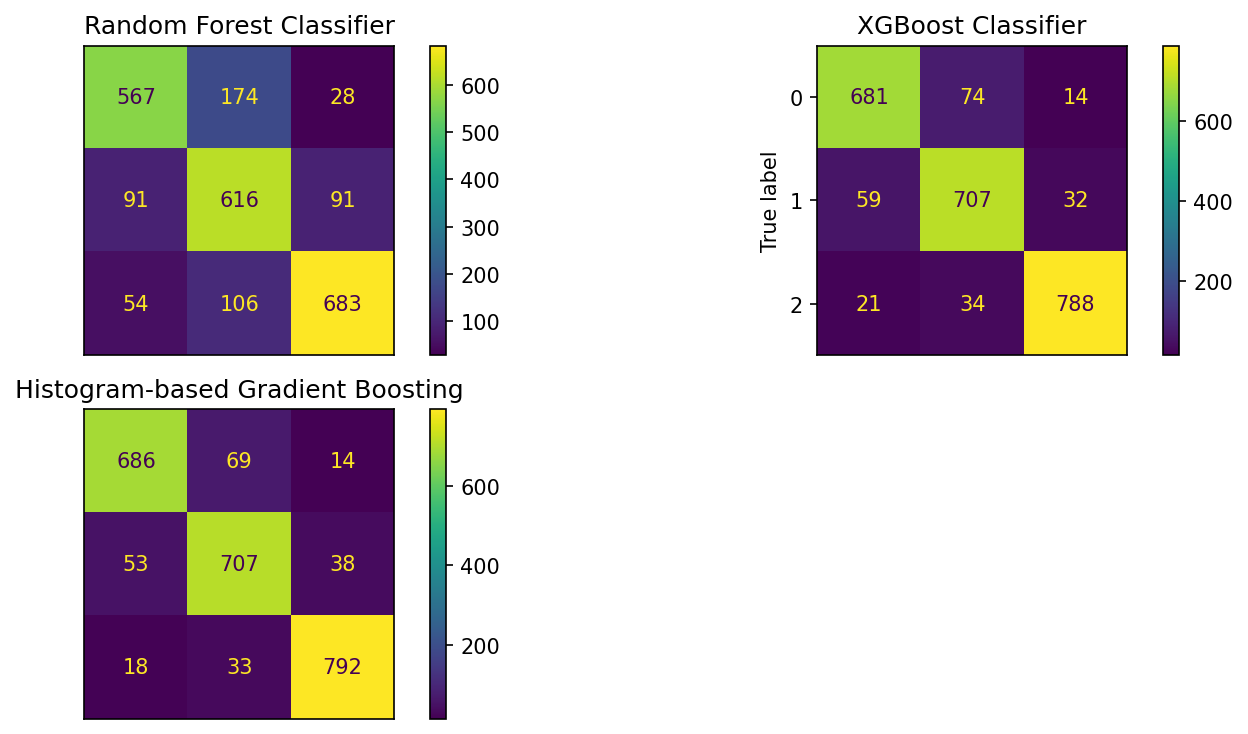

In [64]:
f, axes = plt.subplots(2, 2, figsize=(10,5),dpi=150)

axes[0,0].set_title("Random Forest Classifier", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rfc_preds),display_labels=gs_rfc_model.classes_).plot(ax=axes[0,0])
axes[0,0].xaxis.set_ticklabels(['', '', ''])
axes[0,0].yaxis.set_ticklabels(['', '', ''])
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')
axes[0,0].tick_params(axis='both', which='both', bottom=False, left=False)

axes[0,1].set_title("XGBoost Classifier", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,xg_preds),display_labels=gs_xg_model.classes_).plot(ax=axes[0,1])
axes[0,1].xaxis.set_ticklabels(['', '', ''])
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', which='both', bottom=False)

axes[1,0].set_title("Histogram-based Gradient Boosting", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,hg_preds),display_labels=gs_hg_model.classes_).plot(ax=axes[1,0])
axes[1,0].xaxis.set_ticklabels(['', '', ''])
axes[1,0].yaxis.set_ticklabels(['', '', ''])
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')
axes[1,0].tick_params(axis='both', which='both', bottom=False, left=False)

f.delaxes(axes[1, 1])  

plt.tight_layout();

## ROC AUC 

The ROC curve shows graphically the tradeoff that occurs between trying to maximize the true positive rate vs. trying to minimize the false positive rate. In an ideal situation, we would have sensitivity and specificity near 100% at all cutoffs, meaning we predict perfectly in all cases. In that case, we do not need statistics, because our "success" and "failures" are very easy to tell apart.

### One-vs-Rest ROC Curve

In [58]:
rfc_probs = rfc_model.predict_proba(X_test)
xg_probs = xg_model.predict_proba(X_test)
hg_probs = hg_model.predict_proba(X_test)

In [59]:
from itertools import combinations,cycle
from sklearn.metrics import roc_curve,auc,roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [60]:
n_classes = len(np.unique(y)) 
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
fpr, tpr, roc_auc = dict(), dict(), dict()

def OvRROC(probs,a):
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score of {a}: {roc_auc['micro']:.2f}")

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print(f"Macro-averaged One-vs-Rest ROC AUC score of {a}: {roc_auc['macro']:.2f}")
    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    target_names = ['Stage 1','Stage 2','Stage 3']
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            probs[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
    )  

#### One-vs-Rest ROC AUC score for Random Forest Classifier

Micro-averaged One-vs-Rest ROC AUC score of Random Forest Classifier: 0.91
Macro-averaged One-vs-Rest ROC AUC score of Random Forest Classifier: 0.91


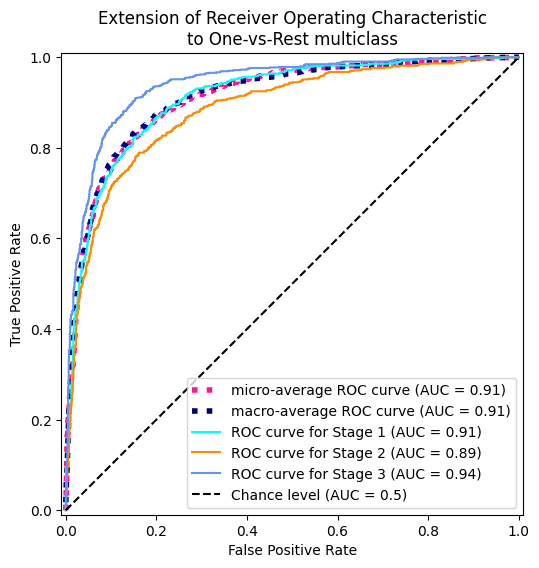

In [61]:
OvRROC(rfc_probs,'Random Forest Classifier')

Random forest yields an excellent macro averaged OvR AUROC score of 0.91, so we can say the model is very good.

#### One-vs-Rest ROC AUC score for XGBoost Classifier

Micro-averaged One-vs-Rest ROC AUC score of XGBoost Classifier: 0.98
Macro-averaged One-vs-Rest ROC AUC score of XGBoost Classifier: 0.98


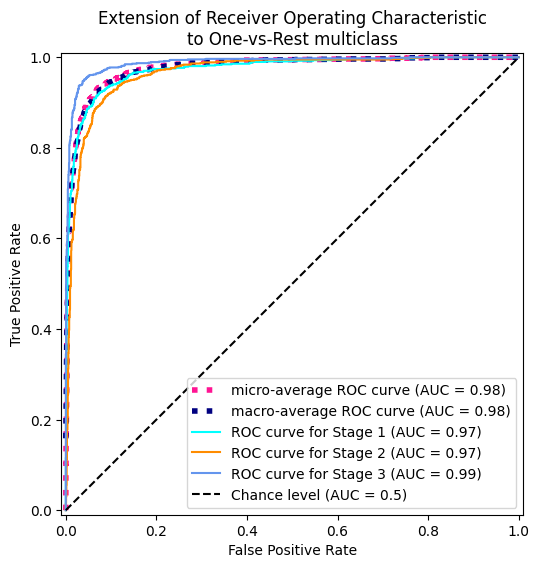

In [62]:
OvRROC(xg_probs,'XGBoost Classifier')

#### One-vs-Rest ROC AUC score for Histogram based Gradient Boosting

Micro-averaged One-vs-Rest ROC AUC score of Histogram based Gradient Boosting Classifier: 0.98
Macro-averaged One-vs-Rest ROC AUC score of Histogram based Gradient Boosting Classifier: 0.98


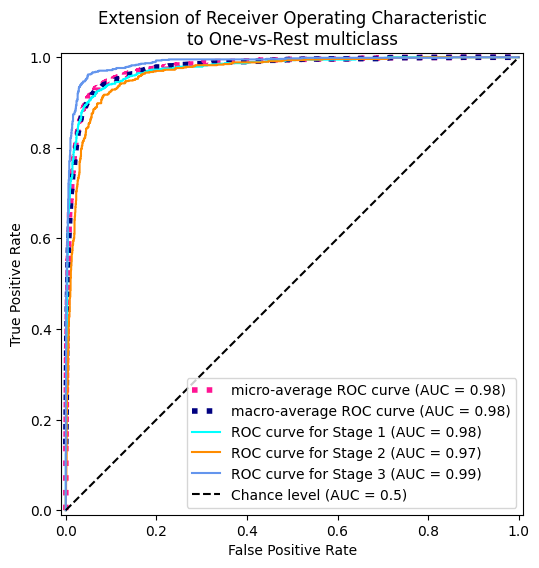

In [63]:
OvRROC(hg_probs,'Histogram based Gradient Boosting Classifier')

XGBoost and Histogram based Gradient Boosting Classifier, each yields an excellent macro averaged OvR AUROC score of 0.98, so we can say the models are excellent.